# Intro to interpolation in 1 dimension

Let's make a bit of data, representing a nonlinear relationship.

In [54]:
x = [10, 20, 30, 50, 60]
y = [0.1, 0.2, 0.4, 1.6, 3.2]

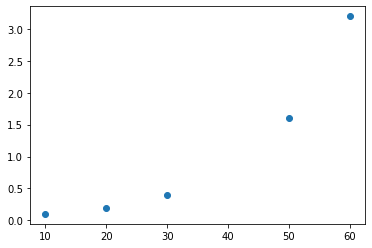

In [55]:
import matplotlib.pyplot as plt

plt.plot(x, y, 'o')

Make a new basis:

In [56]:
import numpy as np

x_new = np.linspace(10, 60, 61)
x_new

array([10.        , 10.83333333, 11.66666667, 12.5       , 13.33333333,
       14.16666667, 15.        , 15.83333333, 16.66666667, 17.5       ,
       18.33333333, 19.16666667, 20.        , 20.83333333, 21.66666667,
       22.5       , 23.33333333, 24.16666667, 25.        , 25.83333333,
       26.66666667, 27.5       , 28.33333333, 29.16666667, 30.        ,
       30.83333333, 31.66666667, 32.5       , 33.33333333, 34.16666667,
       35.        , 35.83333333, 36.66666667, 37.5       , 38.33333333,
       39.16666667, 40.        , 40.83333333, 41.66666667, 42.5       ,
       43.33333333, 44.16666667, 45.        , 45.83333333, 46.66666667,
       47.5       , 48.33333333, 49.16666667, 50.        , 50.83333333,
       51.66666667, 52.5       , 53.33333333, 54.16666667, 55.        ,
       55.83333333, 56.66666667, 57.5       , 58.33333333, 59.16666667,
       60.        ])

## NumPy's `interp`

This thing can only do linear interpolation.

In [57]:
y_new = np.interp(x_new, x, y)

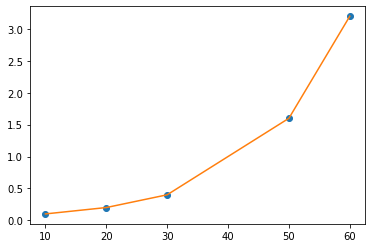

In [58]:
plt.plot(x, y, 'o')
plt.plot(x_new, y_new)

## SciPy's `interp1d`

In [59]:
from scipy.interpolate import interp1d

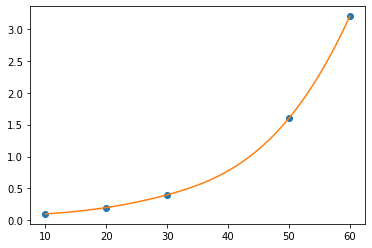

In [60]:
f = interp1d(x, y, kind='cubic')

y_new = f(x_new)

plt.plot(x, y, 'o')
plt.plot(x_new, y_new)

## With `pandas`

The scipy interpolator is available via `pandas` too:

In [61]:
import pandas as pd

df = pd.DataFrame(np.array([x, y]).T, columns=['x', 'y'])
df

,x,y
0,10.0,0.1
1,20.0,0.2
2,30.0,0.4
3,50.0,1.6
4,60.0,3.2


In [62]:
x_new

array([10.        , 10.83333333, 11.66666667, 12.5       , 13.33333333,
       14.16666667, 15.        , 15.83333333, 16.66666667, 17.5       ,
       18.33333333, 19.16666667, 20.        , 20.83333333, 21.66666667,
       22.5       , 23.33333333, 24.16666667, 25.        , 25.83333333,
       26.66666667, 27.5       , 28.33333333, 29.16666667, 30.        ,
       30.83333333, 31.66666667, 32.5       , 33.33333333, 34.16666667,
       35.        , 35.83333333, 36.66666667, 37.5       , 38.33333333,
       39.16666667, 40.        , 40.83333333, 41.66666667, 42.5       ,
       43.33333333, 44.16666667, 45.        , 45.83333333, 46.66666667,
       47.5       , 48.33333333, 49.16666667, 50.        , 50.83333333,
       51.66666667, 52.5       , 53.33333333, 54.16666667, 55.        ,
       55.83333333, 56.66666667, 57.5       , 58.33333333, 59.16666667,
       60.        ])

In [63]:
dg = pd.DataFrame(x_new, columns=['x'])
dg

,x
0,10.000000
1,10.833333
2,11.666667
3,12.500000
4,13.333333
...,...
56,56.666667
57,57.500000
58,58.333333
59,59.166667


In [64]:
dh = pd.merge(df, dg, on='x', how='right')
dh[:15]

,x,y
0,10.000000,0.1
1,10.833333,NaN
2,11.666667,NaN
3,12.500000,NaN
4,13.333333,NaN
5,14.166667,NaN
6,15.000000,NaN
7,15.833333,NaN
8,16.666667,NaN
9,17.500000,NaN


In [65]:
dh = dh.interpolate('cubic')
dh

,x,y
0,10.000000,0.100000
1,10.833333,0.105124
2,11.666667,0.110783
3,12.500000,0.116992
4,13.333333,0.123765
...,...,...
56,56.666667,2.560494
57,57.500000,2.709570
58,58.333333,2.865721
59,59.166667,3.029135


In [66]:
y_new[:5]

array([0.1       , 0.10512394, 0.11078318, 0.11699219, 0.12376543])

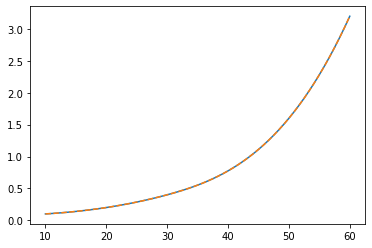

In [67]:
plt.plot(x_new, y_new)
plt.plot(dh.x, dh.y, '--')

## With `sklearn`

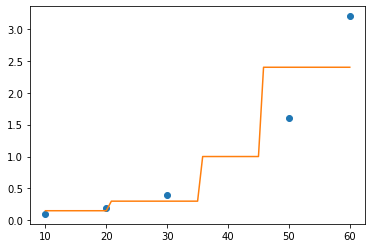

In [78]:
from sklearn.neighbors import KNeighborsRegressor

x = np.array(x).reshape(-1, 1)
x_new = np.array(x_new).reshape(-1, 1)

f = KNeighborsRegressor(n_neighbors=2).fit(x, y)  # x has to be 2D
y_new = f.predict(x_new)

plt.plot(x, y, 'o')
plt.plot(x_new, y_new)

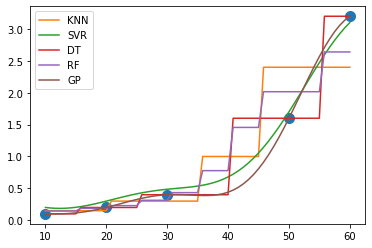

In [93]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

plt.plot(x, y, 'o', ms=10)

models = {
    'KNN': KNeighborsRegressor(n_neighbors=2),
    'SVR': SVR(C=1e3),  # Turn regularization mostly off.
    'DT': DecisionTreeRegressor(),
    'RF': RandomForestRegressor(),
    'GP': GaussianProcessRegressor(kernel=RBF(length_scale=2)),
}

for name, model in models.items():
    f = model.fit(x, y)  # x has to be 2D
    y_new = f.predict(x_new)
    plt.plot(x_new, y_new, label=name)

plt.legend()